<a href="https://colab.research.google.com/github/MuradovMaks/MusicGeneration_LSTM/blob/main/%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D1%83%D0%B7%D1%8B%D0%BA%D0%B8_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Импорт библиотек для midi файлов
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
!pip install --upgrade music21


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fluidsynth is already the newest version (2.2.5-1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [ ]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 2 RELEASES FOR UBUNTU 12.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable
  sudo apt-get update
  sudo apt-get install musescore

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be updated

In [ ]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [ ]:
from music21 import *
# настраиваем окружение в соответствии с документацией
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

In [ ]:
# Импортируем библиотеки
import tensorflow
import os
import numpy as np
import pandas as pd
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import fluidsynth

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras.backend as K
from keras.optimizers import Adamax

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip

--2024-12-19 08:55:24--  https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2751606 (2.6M) [application/x-zip-compressed]
Saving to: ‘classical-music-midi.zip.1’

classical-music-mid 100%[===================>]   2.62M  1.86MB/s    in 1.4s    

2024-12-19 08:55:27 (1.86 MB/s) - ‘classical-music-midi.zip.1’ saved [2751606/2751606]



In [ ]:
!unzip -qo 'classical-music-midi' -d ./dataset

In [ ]:
!dir ./dataset

Albeniz    Borodin	Christmas  Granados  Mendelssohn  Rachmaninoff	Sinding
Bach	   Brahms	Clementi   Grieg     Moszkowski   Ravel		Tchaikovsky
Balakirev  Burgmueller	Debussy    Haydn     Mozart	  Schubert
Beethoven  Chopin	Godowsky   Liszt     Mussorgsky   Schumann


In [ ]:
CLASS_LIST = ['Mozart','Chopin']

In [ ]:
midis_chopin = []
midis_mozart = []

for compositor in CLASS_LIST:
  filepath = f'./dataset/{compositor}/'
  for files in os.listdir(filepath):
    if files.endswith('.mid'):
      if 'chpn' in files:
        tr = filepath + files
      # чтение и парсинг midi-файлов в Stream-объект библиотеки music21
        midi = converter.parse(tr)
        midis_chopin.append(midi)
      else:
        tr = filepath + files
      # чтение и парсинг midi-файлов в Stream-объект библиотеки music21
        midi = converter.parse(tr)
        midis_mozart.append(midi)



In [ ]:
print(midis_chopin)
print(midis_mozart)

[<music21.stream.Score 0x7c6b1cf7f9d0>, <music21.stream.Score 0x7c6b1b57ddb0>, <music21.stream.Score 0x7c6b1b3d7cd0>, <music21.stream.Score 0x7c6b1b3d7d00>, <music21.stream.Score 0x7c6b1b51bf10>, <music21.stream.Score 0x7c6b1ad62a70>, <music21.stream.Score 0x7c6b1a4737f0>, <music21.stream.Score 0x7c6b198e4520>, <music21.stream.Score 0x7c6b1a7f9c30>, <music21.stream.Score 0x7c6b1920bfa0>, <music21.stream.Score 0x7c6bc8cab940>, <music21.stream.Score 0x7c6b17d747f0>, <music21.stream.Score 0x7c6b171784c0>, <music21.stream.Score 0x7c6b13e91510>, <music21.stream.Score 0x7c6b11f187f0>, <music21.stream.Score 0x7c6b18d1f310>, <music21.stream.Score 0x7c6b10ef90f0>, <music21.stream.Score 0x7c6b0ec28fa0>, <music21.stream.Score 0x7c6b0ec29de0>, <music21.stream.Score 0x7c6b0f382a70>, <music21.stream.Score 0x7c6b0ebaa110>, <music21.stream.Score 0x7c6b0e3acf10>, <music21.stream.Score 0x7c6b0d4fc520>, <music21.stream.Score 0x7c6b0ea03d60>, <music21.stream.Score 0x7c6b0eaea200>, <music21.stream.Score 0x

In [ ]:
# Переводим stream Обьекты из all_midis в Ноты

def getNotes(file):
  notes = []
  notes_to_parse = None

  for i in file:
    #Получим инструменты из stream обекта
    songs = instrument.partitionByInstrument(i)

    #Теперь пройдем по всем интсрументам
    for j in songs.parts:
      notes_to_parse = j.recurse()
      # части Stream-объекта, с которым мы работает состоит из разных элементов
      # отберем только интересующие нас элементы note.Note (нота) и chord.Chord (целый аккорд, последовательность нот)
      for element in notes_to_parse:
        if isinstance(element,note.Note):
          notes.append(str(element.pitch)) # Извлекаем ноту как тон ( документация)
        elif isinstance(element,chord.Chord):
          # аккорд функционирует как объект-нота, но имеет несколько последовательных тонов
          notes.append('.'.join(str(n) for n in element.normalOrder))


  return notes

In [ ]:
Corpus_for_train = getNotes(midis_chopin)
print(f'Всего нот: {len(Corpus_for_train)}')
Corpus_for_generate = getNotes(midis_mozart)
print(f'Всего нот: {len(Corpus_for_train)}')

Всего нот: 50498
Всего нот: 50498


In [ ]:
print('Первые 50 нот Шопена:',Corpus_for_train[:50])
print('Первые 50 нот Моцарта:',Corpus_for_generate[:50])

Первые 50 нот Шопена: ['F4', 'F2', 'F4', 'G4', '0.3.5', 'A4', '0.3.5', 'B-4', 'B-2', 'C5', 'D5', '10.2.5', 'E-5', 'B-2', 'F5', 'G5', '3', 'A5', '3.7.10', '10.0', '10.0', '10.0', '10.0', 'A5', 'G5', '5.10', 'B-2', 'B-5', 'D5', '10.2.5', '10.2.5', '3.7', 'F2', 'G5', 'A4', '0.3.5', '0.3.5', '10.2', 'B-2', 'D5', 'E4', '10.2.5', '10.2.5', 'F4', 'F2', 'A4', 'C5', '3.5', 'E-5', 'G5']
Первые 50 нот Моцарта: ['7.10', '3', '3.7', '5.10', 'B-2', '3.7', 'E-3', 'B-3', 'E-4', '2.5', 'B-2', 'E-4', 'G4', 'E-3', 'G#4', 'C3', 'B-4', 'G2', 'C5', 'G#2', '3.7', 'B-2', 'G#4', 'D4', 'F4', 'G4', 'G#4', 'A4', 'B-4', 'B-5', 'G4', 'G5', 'E-4', 'F5', 'B-3', '10.3', 'G3', '2.5', 'B-3', '3.7', 'E-4', '3.8', 'C4', '10.3', 'G3', '11.0', '5.8', '5.8', 'E-5', 'B-3']


In [ ]:
def chord_n_notes(chunk):
  Melody = []
  count = 0
  for i in chunk:
    if('.' in i or i.isdigit()):# Есть ли точка в i
      chord_notes = i.split('.')#Разделяем аккорд на ноты
      notes =[]
      for j in chord_notes:
        inst_note = int(j)
        #Преобразуем обьект в ноту
        note_chunk = note.Note(inst_note)
        notes.append(note_chunk)
        #Обьеденим ноты в аккорды
        chord_chunk = chord.Chord(notes)
        chord_chunk.offset = count
        Melody.append(chord_chunk)
      #Если это нота а не аккорд
    else:
      # из текстового обозначения ноты делаем объект Note (ноту)
      note_chunk = note.Note(i)
      #Позиция ноты
      note_chunk.offset = count
      Melody.append(note_chunk)

    count+=1
  return Melody


Music = chord_n_notes(Corpus_for_train[:100])
Melody_midi = stream.Stream(Music)



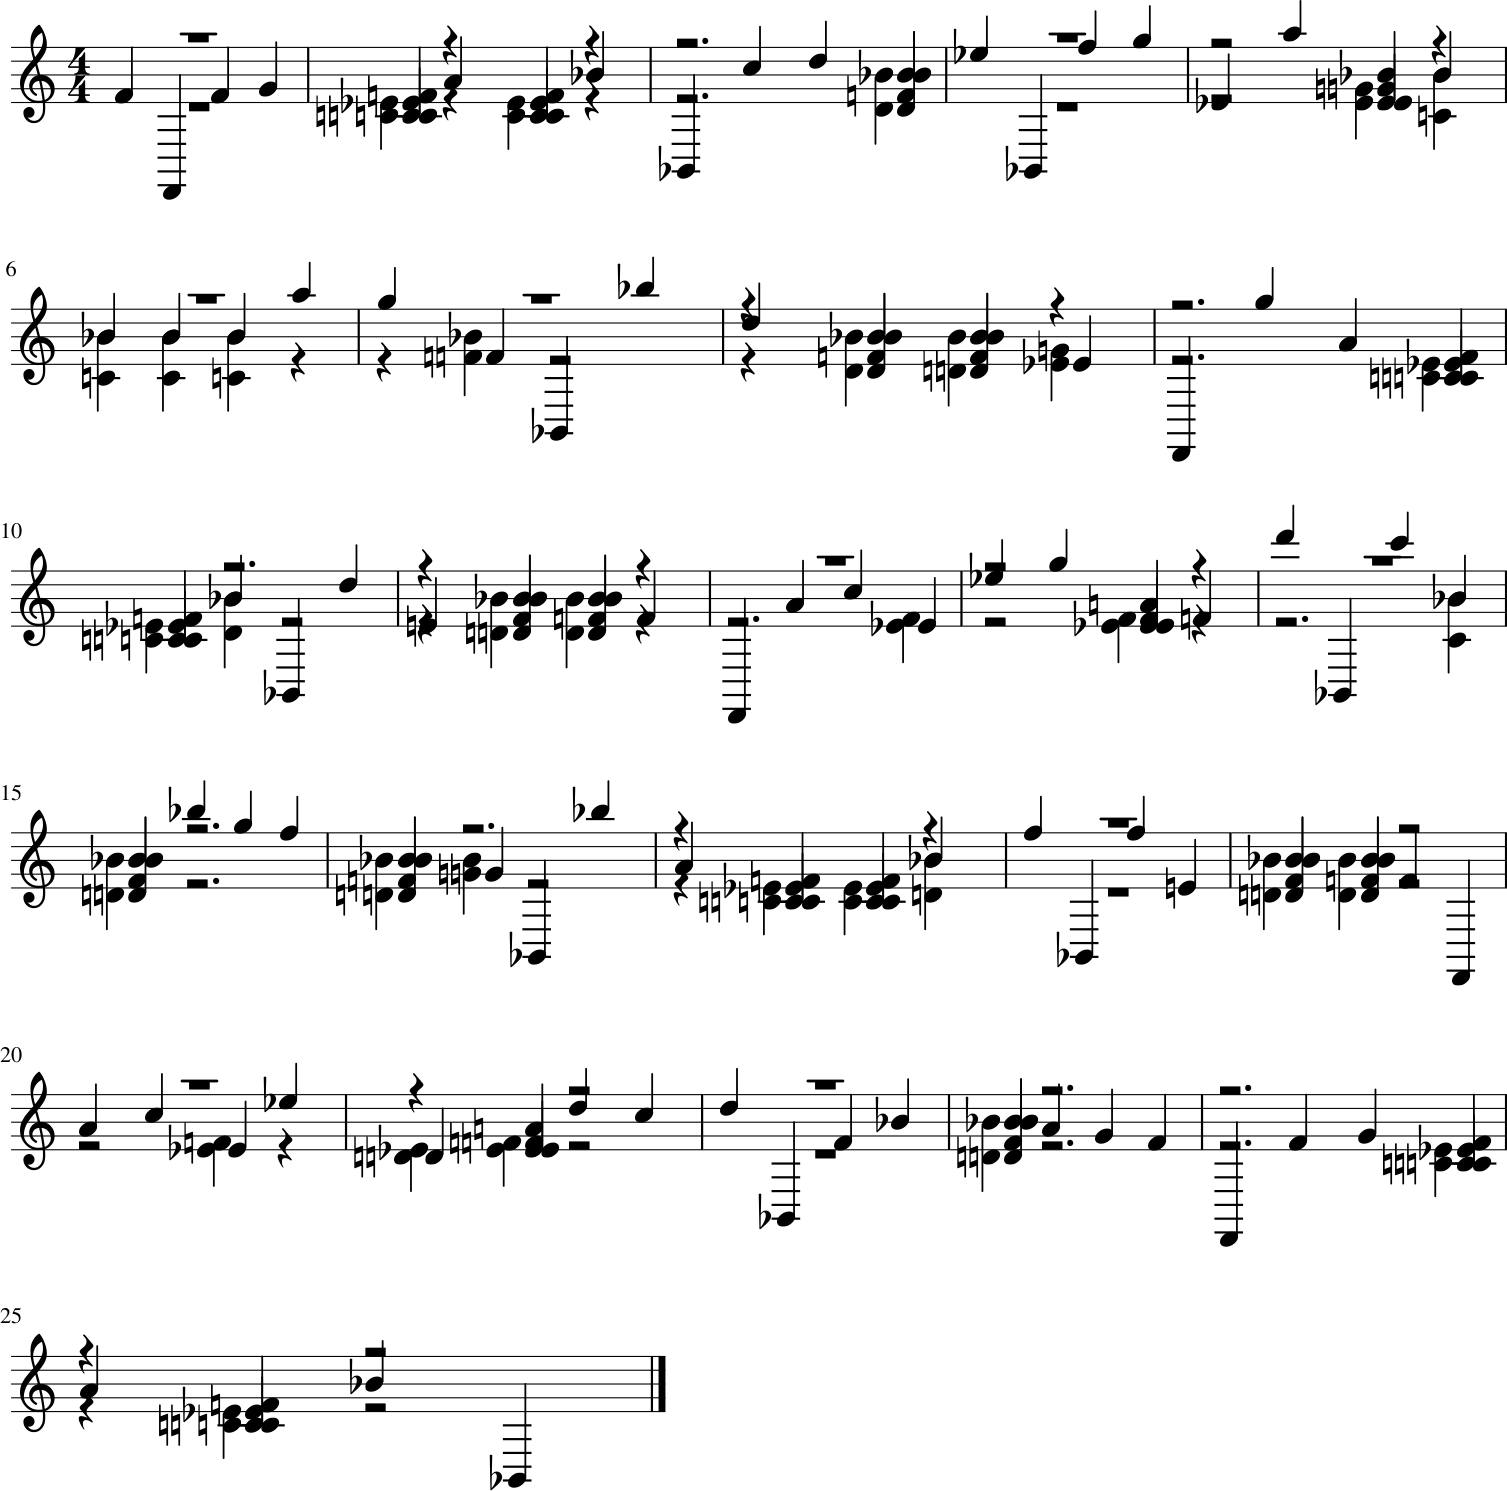

In [ ]:
Melody_midi.show()

In [ ]:
Melody_midi.show('midi')

In [ ]:
#Число уникальных нот в корпусе
from collections import Counter
counter_num_chopin = Counter(Corpus_for_train)
counter_num_mozart = Counter(Corpus_for_generate)
print('Кол-во уникальных нот в корпусе Шопена :',len(counter_num_chopin))
print('Кол-во уникальных нот в корпусе Моцарта:',len(counter_num_mozart))

Кол-во уникальных нот в корпусе Шопена : 394
Кол-во уникальных нот в корпусе Моцарта: 266


In [ ]:
#Нужно определить частоту возникновения разных нот
# Ключ в словаре - имена нот
# Значение в словаре - их количество

Notes_chopin = list(counter_num_chopin.keys())
Notes_num_chopin = list(counter_num_chopin.values())

Notes_mozart = list(counter_num_mozart.keys())
Notes_num_mozart = list(counter_num_mozart.values())

def average(note):
  return sum(note) / len(note)


print(f'Средняя встречаемость нот {average(Notes_num_chopin)}')
print(f'Наиболее часто встречаемые ноты {max(Notes_num_chopin)} раз')
print(f'Наиболее редкие ноты {min(Notes_num_chopin)}')


print(f'Средняя встречаемость нот {average(Notes_num_mozart)}')
print(f'Наиболее часто встречаемые ноты {max(Notes_num_mozart)} раз')
print(f'Наиболее редкие ноты {min(Notes_num_mozart)}')

Средняя встречаемость нот 128.16751269035532
Наиболее часто встречаемые ноты 1320 раз
Наиболее редкие ноты 1
Средняя встречаемость нот 237.58646616541353
Наиболее часто встречаемые ноты 2402 раз
Наиболее редкие ноты 1


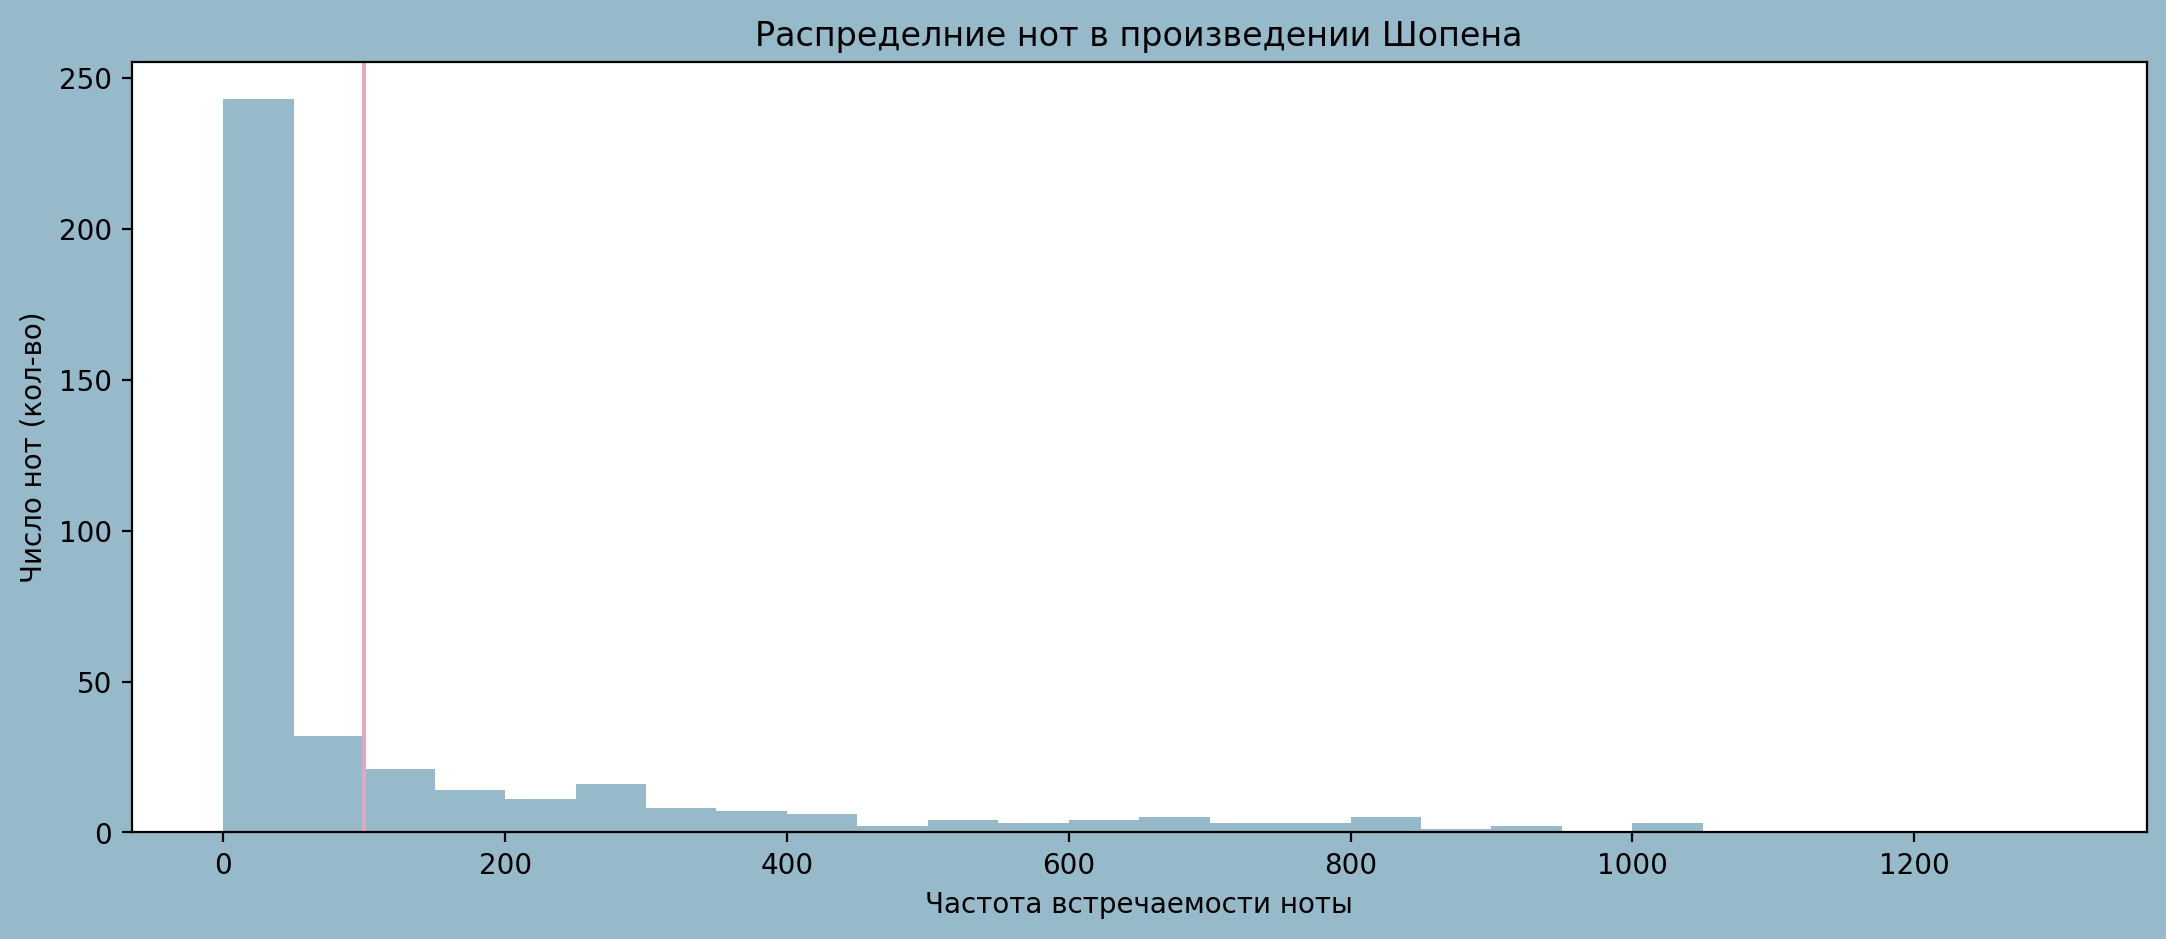

In [ ]:
plt.figure(figsize=(13,5),facecolor='#97BACB')
bins = np.arange(0,max(Notes_num_chopin),50)
plt.hist(Notes_num_chopin,bins=bins,color='#97BACB')
plt.axvline(x=100,color='#DBACC1') #Отсечка по встречаемости в 100 раз
plt.title('Распределние нот в произведении Шопена')
plt.xlabel('Частота встречаемости ноты')
plt.ylabel('Число нот (кол-во)')
plt.show()

In [ ]:
#Чтобы не путать нашу нейронку. Исключим ноты которые редко встречаются менее 100 раз

def rare_note(counter_num):
  rare_note = []
  for index,(key,value) in enumerate(counter_num.items()):
    if value < 100:
      rare_note.append(key)
  return rare_note

rare_chopin = rare_note(counter_num_chopin)
rare_mozart = rare_note(counter_num_mozart)
print(f'Общее число нот которые встречаются меньше 100 раз у Шопена: {len(rare_chopin)}')
print(f'Общее число нот которые встречаются меньше 100 раз у Шопена: {len(rare_mozart)}')

Общее число нот которые встречаются меньше 100 раз у Шопена: 275
Общее число нот которые встречаются меньше 100 раз у Шопена: 171


In [ ]:
def remove_notes(corpus,rare_note):
  for element in corpus:
    if element in rare_note:
      corpus.remove(element)
  return corpus

Corpus_for_train = remove_notes(Corpus_for_train,rare_chopin)
Corpus_for_generate = remove_notes(Corpus_for_generate,rare_mozart)

In [ ]:
print("Длина корпуса у Шопена после исключения редких нот:", len(Corpus_for_train))
print("Длина корпуса у Моцарта после исключения редких нот:", len(Corpus_for_generate))


Длина корпуса у Шопена после исключения редких нот: 46485
Длина корпуса у Моцарта после исключения редких нот: 59901


In [ ]:
#Выполним предобработку данных. Маппинг. Чтобы наша модель могла принимать вместо нот числовые прдеставления
#Сохраняем список уникальных значений нот
def mapping(Corpus):
  symb = sorted(list(set(Corpus)))
  len_corp = len(Corpus) # длина корпуса
  len_symbol = len(symb) # длина уникальных символов
  # Создание словаря для доступа к словарному запасу из индексов и наоборот
  mapping = dict((c,i) for i,c in enumerate(symb))
  reverse_mapping = dict((i,c) for i,c in enumerate(symb))
  print("Общее число символов:", len_corp)
  print("Число уникальных символов:", len_symbol)

  return mapping,reverse_mapping

mapping_chopin,reverse_mapping_chopin = mapping(Corpus_for_train)
mapping_mozart,reverse_mapping_mozart = mapping(Corpus_for_generate)

Общее число символов: 46485
Число уникальных символов: 255
Общее число символов: 59901
Число уникальных символов: 191


In [ ]:
# Разбиение корпуса на равные входные строки и выходные целевые последовательности

# длинны последовательностей

length = 40
#Входные признаки

def getSequences(Corpus,len_corp,mapping,length=40):
  feature = []
  #Цели
  target = []
  for i in range(0,len_corp - length,1):
    features = Corpus[i:i + length]
    targets = Corpus[i+length]
    feature.append([mapping[j] for j in features])
    target.append(mapping[targets])
    l_sequences = len(feature)


  return feature,target
chopin_len = len(Corpus_for_train)
mozart_len = len(Corpus_for_generate)
chopin_features,chopin_target = getSequences(Corpus_for_train,chopin_len,mapping_chopin)
mozart_features,mozart_target = getSequences(Corpus_for_generate,mozart_len,mapping_mozart)

In [ ]:
#Нормализуем данные
symb_chopin = sorted(list(set(Corpus_for_train)))
symb_mozart = sorted(list(set(Corpus_for_generate)))

X_chopin = (np.reshape(chopin_features,(len(chopin_features),length,1)))/float(len(symb_chopin))
y_chopin = tensorflow.keras.utils.to_categorical(chopin_target)

X_mozart = (np.reshape(mozart_features,(len(mozart_features),length,1)))/float(len(symb_mozart))
y_mozart = tensorflow.keras.utils.to_categorical(mozart_target)

In [ ]:
print(f'Форма входных данных Шопен: {X_chopin.shape}')
print(f'Форма выходных данных Шопен: {y_chopin.shape}')

print(f'Форма входных данных Моцарт: {X_mozart.shape}')
print(f'Форма выходных данных Моцарт: {y_mozart.shape}')

Форма входных данных Шопен: (46445, 40, 1)
Форма выходных данных Шопен: (46445, 255)
Форма входных данных Моцарт: (59861, 40, 1)
Форма выходных данных Моцарт: (59861, 191)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_chopin,y_chopin,random_state=42,test_size=0.2)
x_seed, _, y_seed, _ = train_test_split(X_mozart, y_mozart, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(LSTM(256,input_shape=X_chopin.shape[1:],return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(128))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(y_chopin.shape[1],activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 255)                 │          32,895 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 510,719 (1.95 MB)

 Trainable params: 510,719 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train,y_train,batch_size=256,epochs=150)

Epoch 1/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.0204 - loss: 4.8937
Epoch 2/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0229 - loss: 4.6767
Epoch 3/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0255 - loss: 4.6493
Epoch 4/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0332 - loss: 4.4896
Epoch 5/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0341 - loss: 4.4451
Epoch 6/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0362 - loss: 4.4232
Epoch 7/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0382 - loss: 4.4081
Epoch 8/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0372 - loss: 4.3896
Epoch 9/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0370 - loss: 4.3838
Epoch 10/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0382 - loss: 4.3819
Epoch 11/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0371 - loss: 4.3828
Epoch 12/150
146/146 ━━━━━━━━━

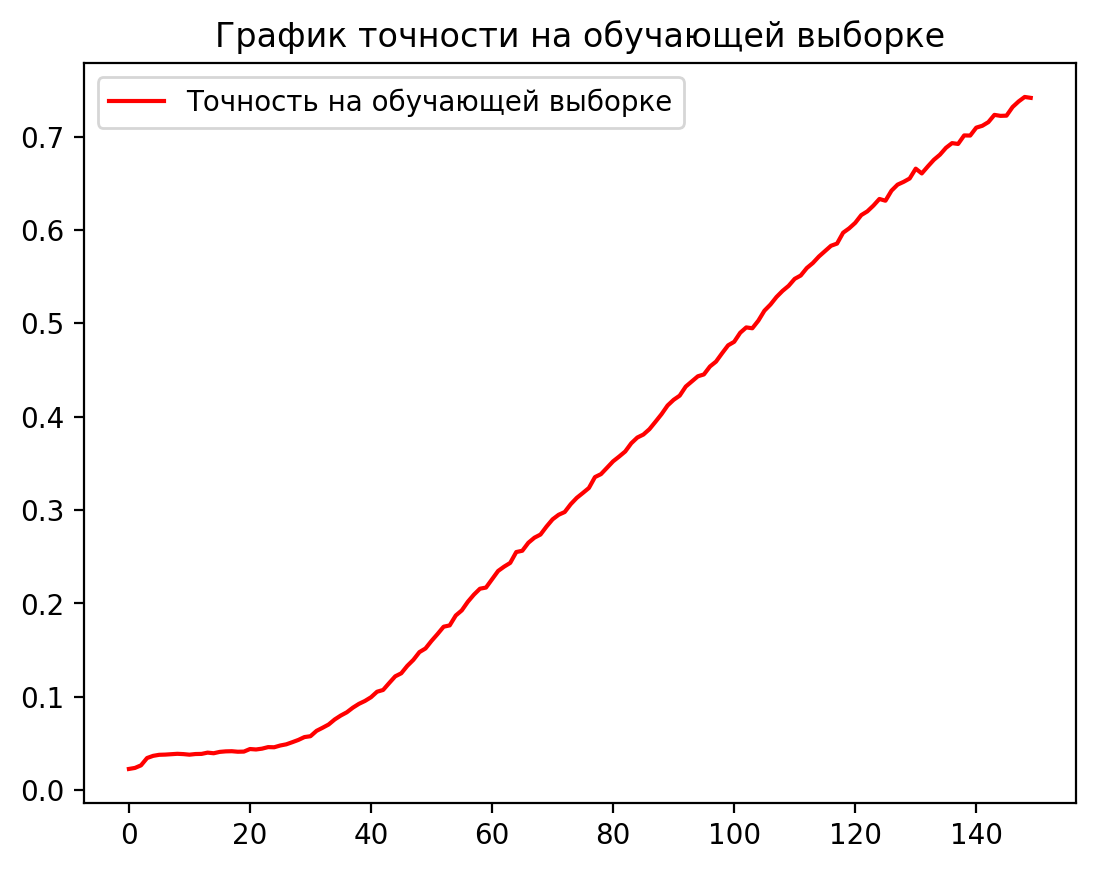

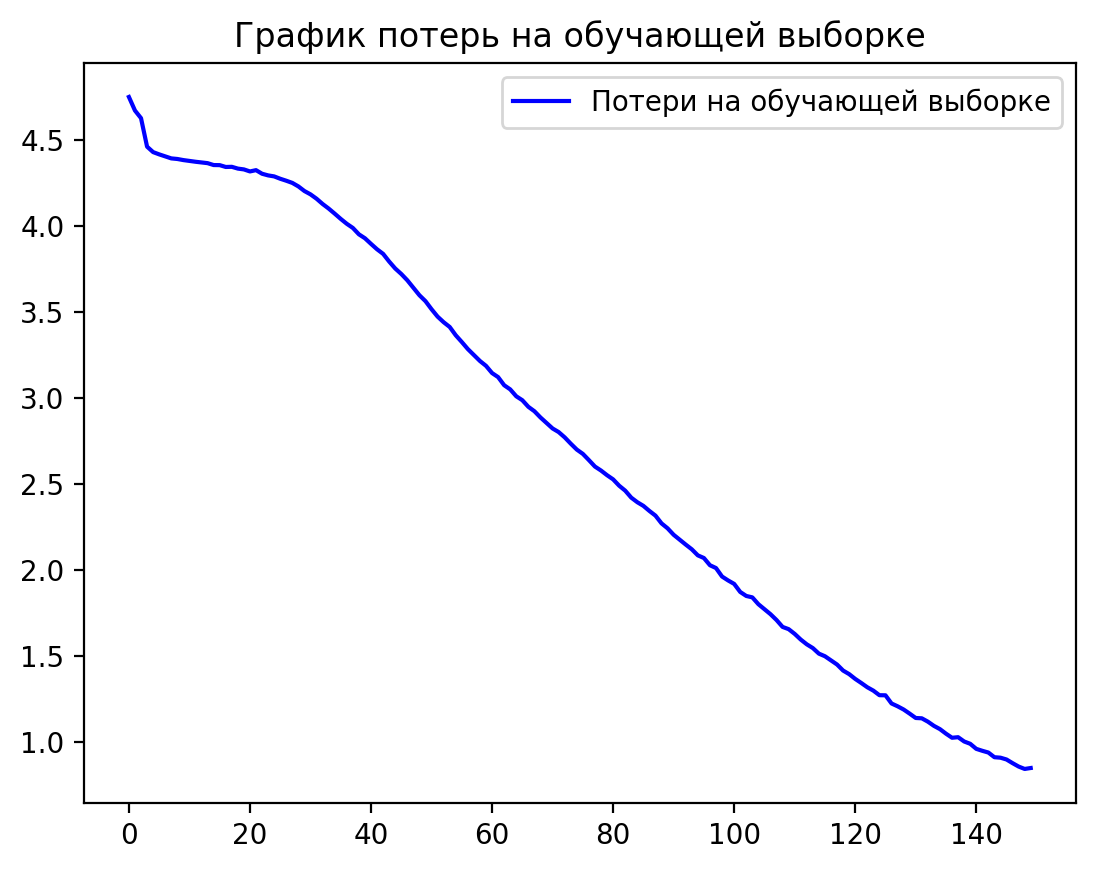

In [ ]:
plt.plot(history.epoch, history.history['accuracy'], 'r', label='Точность на обучающей выборке')
plt.title('График точности на обучающей выборке')
plt.legend()
plt.figure()
plt.plot(history.epoch, history.history['loss'], 'b', label='Потери на обучающей выборке')
plt.title('График потерь на обучающей выборке')
plt.legend()
plt.show()

In [ ]:
def music_generator(seq_len,temperature=1.0):
    # случайный выбор начальной последовательности
    seed = x_seed[np.random.randint(0, len(x_seed)-1)]
    music = []
    notes = []
    for i in range(seq_len):
        # изменяем размер данных для передачи модели
        seed = seed.reshape(1, length, 1)

        # предсказываем по начальной последовательности
        prediction = model.predict(seed, verbose=0)[0]

        # предсказанные значения прогоняем через функцию softmax
        exp_preds = np.exp(prediction/temperature)
        prediction = exp_preds / np.sum(exp_preds)

        # выбираем индекс наиболее вероятного класса
        index = np.argmax(prediction)

        # нормализованный индекс в интервале [0, 1]
        # значение пойдет в seed, а там все значения в интервале [0, 1]
        index_N = index / float(len(symb_mozart))

        # складываем в список индекс предсказанной ноты
        notes.append(index)

        # обратное преобразование по словарю, на выходе последовательность нот
        music = [reverse_mapping_chopin[char] for char in notes]

        # seed всегда длины length
        # добавляем справа новое значение, а слева удаляем и уходим на новую итерацию цикла
        seed = np.insert(seed[0], len(seed[0]), index_N)
        seed = seed[1:]

    return chord_n_notes(music)


In [ ]:
genMusic = music_generator(seq_len=100)
genMidi = stream.Stream(genMusic)

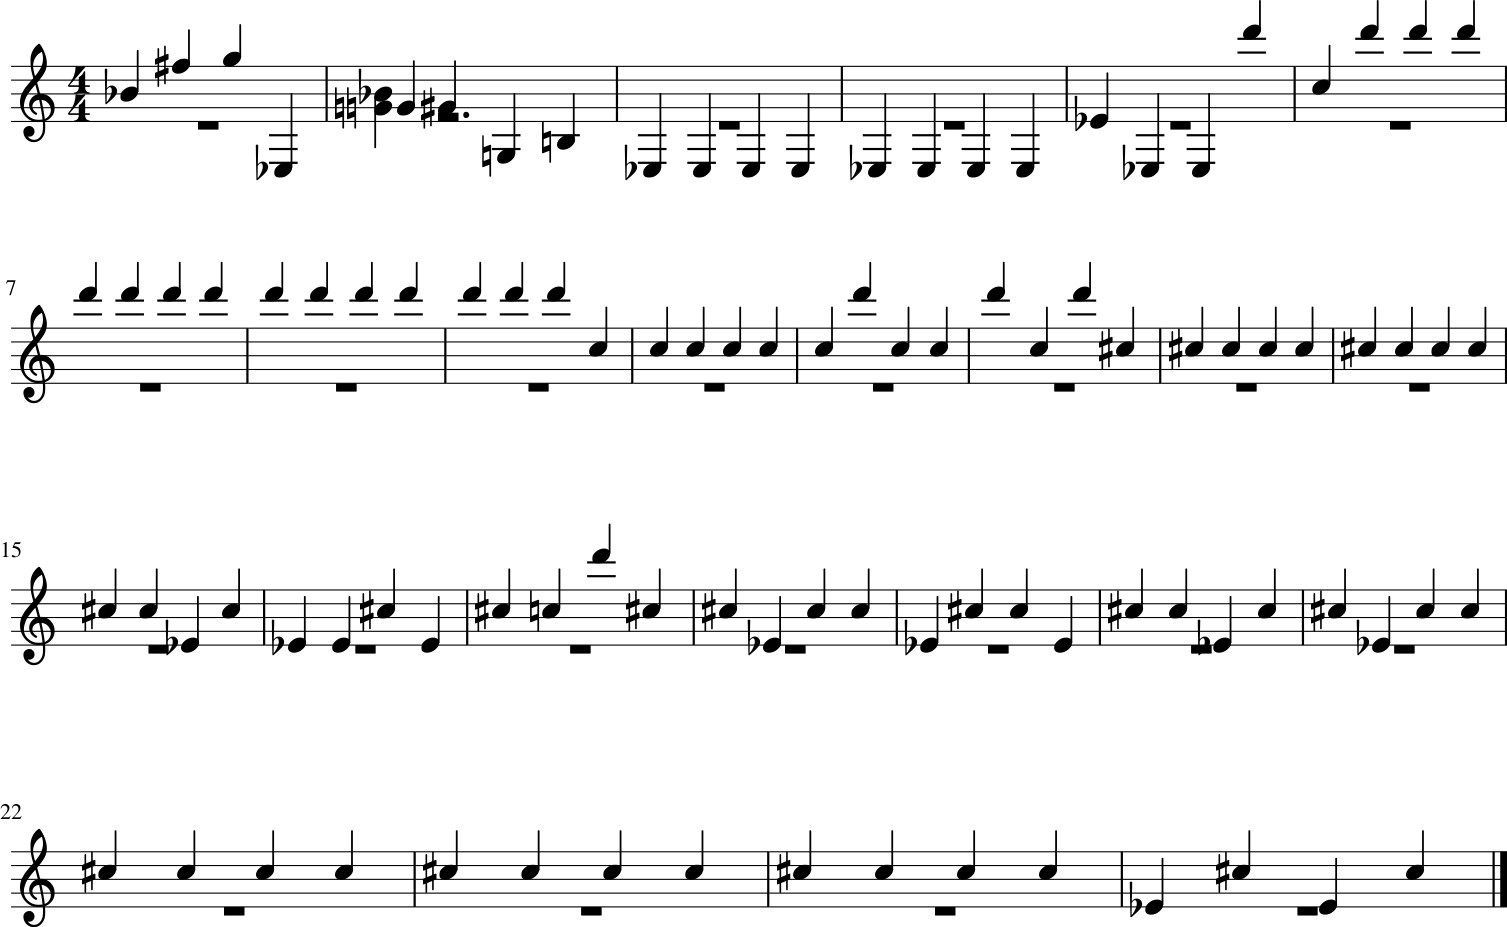

In [ ]:
# Отобразим нотный стан
genMidi.show()

In [ ]:
# Выведем в виде звуковой дорожки
genMidi.show('midi')